## Autocorrelation

Consider the following random process:

\begin{equation}
X_0 = 0, \qquad
X_t = X_{t-1} + Z,
\end{equation}

where $t=1,\dots,N$ and

\begin{equation}
Z \sim \mathcal{N}(0, 1).
\end{equation}

We can think about $t$ as a discrete measure of time. Let's look at a few realizations:

In [1]:
import numpy as np
import matplotlib.pylab as plt

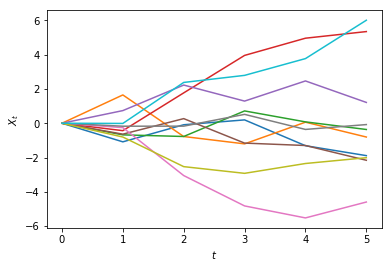

In [2]:
# Make results reproducible
np.random.seed(123)

def generate_paths(num_steps, num_paths):
    randn = np.random.normal(size=(num_paths, num_steps))
    return np.column_stack((np.zeros(num_paths), randn.cumsum(axis=1)))

for path in generate_paths(5, 10):
    plt.plot(range(6), path)

plt.xlabel(r"$t$")
plt.ylabel(r"$X_t$");

What is the distribution of $X_1, \dots, X_N$? By definition $X_1$ is distributed as a standard normal. Since $X_2 = X_1 + Z$, it is the sum of two standard normals. The pattern should be clear: $X_t$ is the sum of $t$ standard normals. Recall that if $Z_i \sim \mathcal{N}(\mu_i, \sigma_i^2)$, then $\sum_i Z_i \sim \mathcal{N}(\sum_i \mu_i, \sum_i \sigma_i^2)$. Therefore:

\begin{equation}
X_t \sim \mathcal{N}(0, t).
\end{equation}

This is telling us that if we were only looking at time $t$, we would find that the distribution of values is given by the normal distribution with zero mean and standard deviation $\sqrt{t}$.

Let $X_t^{(i)}$ denote the value of the $i$th path at time step $t$. Then, the sample mean $\bar{X}_t$ and variance $\hat{\sigma}_t^2$ of $X_t$ can be calculated via:

\begin{equation}
\bar{X}_t = \frac{1}{M}\sum_{i=1}^{M}X_t^{(i)}, \qquad
\hat{\sigma}^2_t = \frac{1}{M-1}\sum_{i=1}^{M}(X_t^{(i)} - \bar{X}_t)^2,
\end{equation}

Let's compare $\bar{X}_t$ and $\hat{\sigma}_t$ with their population counterparts using an example:

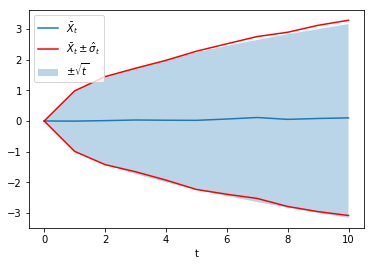

In [3]:
paths = generate_paths(10, 1000)
mean = np.mean(paths, axis=0)
std = np.std(paths, ddof=1, axis=0)

ts = np.arange(11)
plt.plot(ts, mean, label=r'$\bar{X}_t$')
plt.plot(ts, mean - std, label=r'$\bar{X}_t \pm \hat{\sigma}_t$', color='r')
plt.plot(ts, mean + std, color='r')
plt.fill_between(ts, -np.sqrt(ts), +np.sqrt(ts), alpha=0.3, label=r'$\pm \sqrt{t}$')
plt.xlabel("t")
plt.legend();

What is the correlation between $X_{t}$ and $X_s$ ($t < s$)? Intuitively, we know that the different values along a path should be correlated. For example, if we condition on $X_7 = 10$ (i.e. only look at paths where $X_7=10$), then $X_8 \sim \mathcal{N}(10, 1)$. The covariance $K(t, s)$ between $X_t$ and $X_s$ is defined as:

\begin{equation}
K(t, s) \equiv \mathbb{E}[(X_t - \mathbb{E}[X_t])(X_s - \mathbb{E}[X_s])].
\end{equation}

$K(t, s)$ is also called the *auto-covariance* function. The *auto-correlation coefficient* is defined as:

\begin{equation}
\rho(t, s) \equiv \frac{K(t, s)}{\sigma_t\sigma_s},
\end{equation}

where

\begin{equation}
\sigma^2_t \equiv \mathbb{E}[(X_t - \mathbb{E}[X_t])^2].
\end{equation}

For the process we're considering $\mathbb{E}[X_t] = 0$ and $\sigma_t=\sqrt{t}$, so:

\begin{equation}
\rho(t, s) = \frac{\mathbb{E}[X_tX_s]}{\sqrt{t}\sqrt{s}}.
\end{equation}

If we've simulated $M$ paths with $N$ time steps each, we can calculate the sample auto-covariance function $\hat{K}(t, s)$ as follows:

\begin{equation}
\hat{K}(t, s) \equiv \frac{1}{M-1}\sum_{i=1}^{M}(X_t^{(i)} - \bar{X}_t)(X_s^{(i)} - \bar{X}_s).
\end{equation}

Similarly, the sample auto-correlation function $\hat{\rho}(t, s)$ is given by

\begin{equation}
\hat{\rho}(t, s) \equiv \frac{\hat{K}(t, s)}{\hat{\sigma}_t\hat{\sigma}_s}.
\end{equation}

In [4]:
xx = generate_paths(10, 10000)
np.cov(np.row_stack((xx[:, 2], xx[:, 8])))

array([[2.04340526, 1.98637077],
       [1.98637077, 7.80698338]])

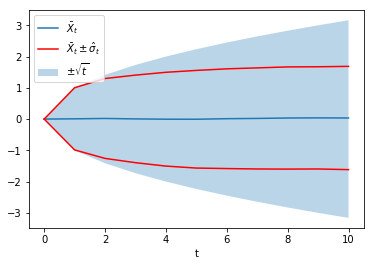

In [5]:
randn = np.random.normal(size=(10000, 10))

beta = 0.8

ps = np.zeros((10000, 10 + 1))
for t in range(1, 10 + 1):
    ps[:, t] += beta * ps[:, t-1] + randn[:, t-1]

mean = np.mean(ps, axis=0)
std = np.std(ps, ddof=1, axis=0)

ts = np.arange(11)
plt.plot(ts, mean, label=r'$\bar{X}_t$')
plt.plot(ts, mean - std, label=r'$\bar{X}_t \pm \hat{\sigma}_t$', color='r')
plt.plot(ts, mean + std, color='r')
plt.fill_between(ts, -np.sqrt(ts), +np.sqrt(ts), alpha=0.3, label=r'$\pm \sqrt{t}$')
plt.xlabel("t")
plt.legend();